<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [1]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [2]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [3]:
# Activate the environement for windows
!.\data_analytics\Scripts\activate

In [25]:
# Activate the environement for linux (debian based)
#!. data_analytics/bin/activate

'.' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


### 2. Importing necessary tools:<a id='importing'></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [5]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df=pd.read_csv('kc_house_data.csv')

# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [6]:
# To-Do: Print the dataframe's info
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,...,8,1530.0,0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,...,8,2310.0,0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,...,7,1020.0,0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,...,8,1600.0,0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287


### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [7]:
# To-Do: deal with the NAs in your dataset in one line

#I ma going to use listwise deletion because there is some missing values in the date features so we can't use the imputation method
df.dropna(inplace=True)
#check if we deal with all the missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [10]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21588, dtype: bool


In [8]:
# To-Do: delete the values of the variables that are useless
df=df.drop(['floors','id','condition','date','zipcode','lat','long','view','waterfront'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  float64
 4   sqft_lot       21588 non-null  float64
 5   grade          21588 non-null  int64  
 6   sqft_above     21588 non-null  float64
 7   sqft_basement  21588 non-null  int64  
 8   yr_built       21588 non-null  float64
 9   yr_renovated   21588 non-null  float64
 10  sqft_living15  21588 non-null  float64
 11  sqft_lot15     21588 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 2.1 MB


### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [10]:
# To-Do : get to know more your data WITHOUT modifying it !!
mean = df.mean()
median = df.median()
quantile_25 = df.quantile(0.25)
std = df.std()
nb_uniq_grade = pd.unique(df['grade'])
print('mean: \n ',mean,'\n')
print('median :\n',median,'\n')
print('quantile : \n',quantile_25,'\n')
print('the standard_variation is : \n',std,'\n \n')
print('the number of uniques values the column grade has is : ',nb_uniq_grade,'\n')



mean: 
  price            540154.482490
bedrooms              3.370576
bathrooms             2.114670
sqft_living        2079.916528
sqft_lot          15113.699463
grade                 7.656985
sqft_above         1788.385353
sqft_basement       291.531175
yr_built           1971.004910
yr_renovated         84.408329
sqft_living15      1986.594265
sqft_lot15        12771.769826
dtype: float64 

median :
 price            450000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1910.00
sqft_lot           7620.00
grade                 7.00
sqft_above         1560.00
sqft_basement         0.00
yr_built           1975.00
yr_renovated          0.00
sqft_living15      1840.00
sqft_lot15         7620.00
dtype: float64 

quantile : 
 price            321987.50
bedrooms              3.00
bathrooms             1.75
sqft_living        1430.00
sqft_lot           5040.00
grade                 7.00
sqft_above         1190.00
sqft_basement         0.00
yr_built           195

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [11]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
df['price']=(df.sqft_living - df.sqft_living.mean() )/df.sqft_living.std()
df=df[df['price']<2.5]



In [12]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21126 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21126 non-null  float64
 1   bedrooms       21126 non-null  int64  
 2   bathrooms      21126 non-null  float64
 3   sqft_living    21126 non-null  float64
 4   sqft_lot       21126 non-null  float64
 5   grade          21126 non-null  int64  
 6   sqft_above     21126 non-null  float64
 7   sqft_basement  21126 non-null  int64  
 8   yr_built       21126 non-null  float64
 9   yr_renovated   21126 non-null  float64
 10  sqft_living15  21126 non-null  float64
 11  sqft_lot15     21126 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 2.1 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.979727,3,1.00,1180.0,5650.0,7,1180.0,0,1955.0,0.0,1340.0,5650
1,0.533547,3,2.25,2570.0,7242.0,7,2170.0,400,1951.0,1991.0,1690.0,7639
2,-1.426088,2,1.00,770.0,10000.0,6,770.0,0,1933.0,0.0,2720.0,8062
3,-0.130551,4,3.00,1960.0,5000.0,7,1050.0,910,1965.0,0.0,1360.0,5000
4,-0.435384,3,2.00,1680.0,8080.0,8,1680.0,0,1987.0,0.0,1800.0,7503


### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

price            1.000000
bedrooms         0.581933
bathrooms        0.724711
sqft_living      1.000000
grade            0.727843
sqft_above       0.852918
sqft_living15    0.742945
Name: price, dtype: float64
             bathrooms  sqft_living
bathrooms     1.000000     0.724711
sqft_living   0.724711     1.000000
           bathrooms     grade
bathrooms   1.000000  0.626467
grade       0.626467  1.000000
            bathrooms  sqft_above
bathrooms    1.000000    0.644649
sqft_above   0.644649    1.000000
            sqft_above     grade
sqft_above    1.000000  0.720276
grade         0.720276  1.000000
             sqft_above  sqft_living
sqft_above     1.000000     0.852918
sqft_living    0.852918     1.000000
               sqft_living15     grade
sqft_living15       1.000000  0.683843
grade               0.683843  1.000000


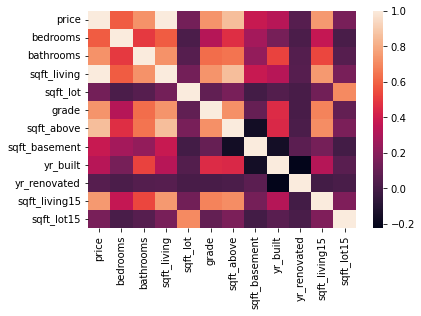

In [13]:
# To-Do : perform feature selection using correlation
# here we use Filter methods .We will be using the correlation coefficient(Pearson's test)
sns.heatmap(df.corr())
#correlation with ouput variables
cor=df.corr()
cor_target=abs(cor["price"])
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)
#check the correlation between these features
print (df[['bathrooms','sqft_living' ]].corr())
print (df[['bathrooms','grade' ]].corr())
print (df[['bathrooms','sqft_above' ]].corr())
print (df[['sqft_above','grade' ]].corr())
print (df[['sqft_above','sqft_living' ]].corr())
print (df[['sqft_living15','grade' ]].corr())

In [14]:
# To-Do : drop the variables that seem highly correlated to you
df=df.drop(['sqft_above','sqft_living'],axis=1)

### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [15]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)

In [16]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
result=LinearRegression()
result.fit(X,Y)

LinearRegression()

In [17]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
result.score(X, Y)

0.8086871353266174

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.